# Notebook exploring TChiWZ and TSlepSlep MC samples

begin with some import statements

In [1]:
import os
import uproot
from glob import glob
from coffea.nanoevents import NanoEventsFactory
#SWAN 
base_directory = "/eos/user/d/dgrove/datasets/"

files = sorted(glob(f"{base_directory}TChiWZ/*.root"))


file = uproot.open(files[0])
print("file info:")
dict(file)

file info:


{'tag;1': <TObjString 'untagged' at 0x7fc2d5cf4430>,
 'Events;1': <TTree 'Events' (1875 branches) at 0x7fc2d5cf8c10>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (2 branches) at 0x7fc2d5cf8a30>,
 'Runs;1': <TTree 'Runs' (1618 branches) at 0x7fc2d5cf8550>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7fc2d5cf8610>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7fc28a3b6eb0>}

In [2]:
events = NanoEventsFactory.from_root(files[0]).events()

/eos/user/d/dgrove/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/eos/user/d/dgrove/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


In [3]:
import awkward as ak
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep


mplhep.style.use(mplhep.style.CMS)

In [4]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

In [5]:
#events.fields

[2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[True, False, False, False, False, False, ... False, False, False, False, False]
[[13.5, 5.44], [21.2, 12.2, 8.19, 6.17, 5.39], ... 14.8], [30.1, 8.44], [10.5, 7.95]]
[13.5, 21.2, 40.7, 21.7, 20.2, 8.11, 10.7, ... 27.1, 12, 15.6, 30, 19, 30.1, 10.5]
[5.44, 12.2, 11, 13, 16.5, 7.92, 6.64, ... 22.2, 7.97, 14.4, 15.4, 14.8, 8.44, 7.95]


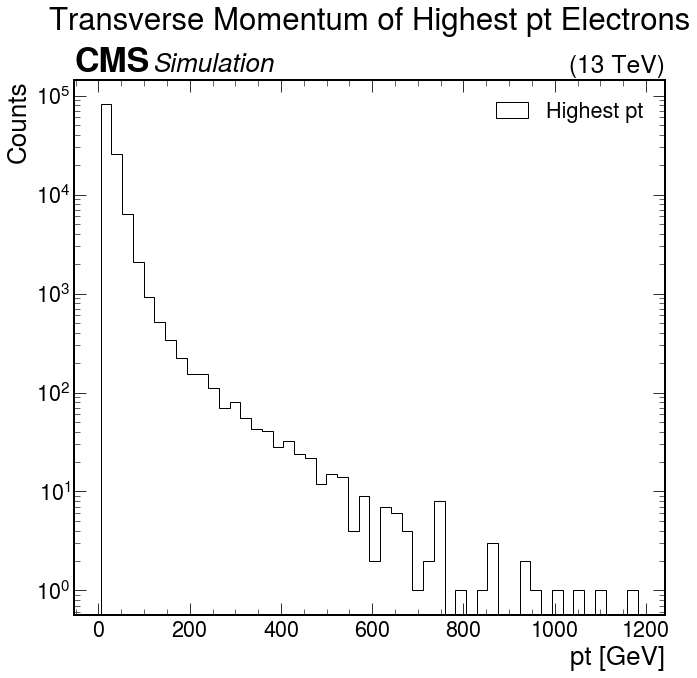

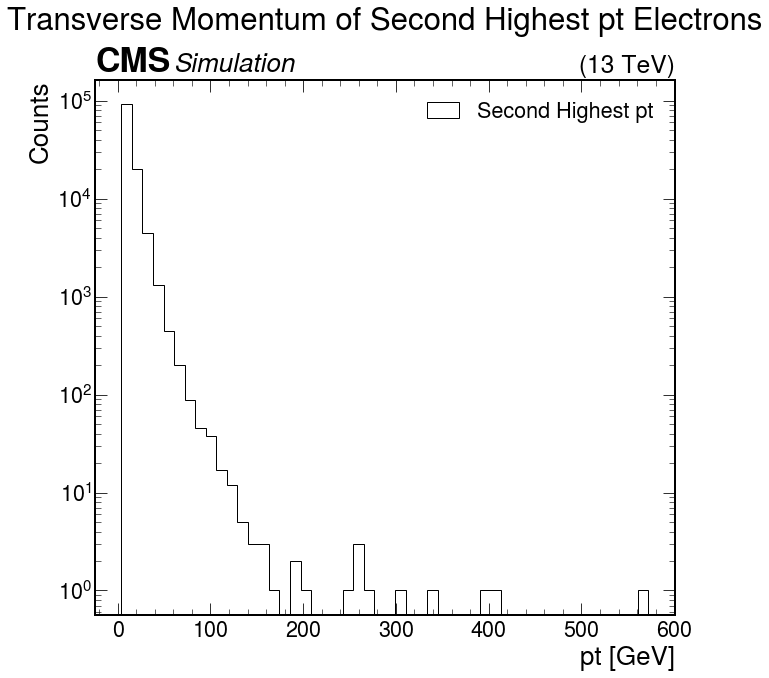

In [6]:
electrons = events.Electron
dielectron_events = electrons[ak.num(electrons)>=2]

#gtoe_2e_mc = ak.num(mcevents.Electron[ak.num(mcevents.Electron)>=2], axis=0)
print(ak.num(electrons))
print(ak.num(electrons)>=2)
dielectron_events

# Sort the electrons by pt in each event
sorted_dielectron_events = dielectron_events[ak.argsort(dielectron_events.pt, axis=1, ascending=False)]
print(sorted_dielectron_events.pt)

# Select the highest pt electrons
highest_pt_electrons = sorted_dielectron_events[:, 0]  # First electron in each event
print(highest_pt_electrons.pt)

# Select the second-highest pt electrons
second_highest_pt_electrons = sorted_dielectron_events[:, 1]  # Second electron in each event
print(second_highest_pt_electrons.pt)

# Plot the highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(highest_pt_electrons.pt), bins=50, histtype='step', label="Highest pt", color='black')
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Highest pt Electrons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

# Plot the second-highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(second_highest_pt_electrons.pt), bins=50, histtype='step', label="Second Highest pt", color='black')
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Second Highest pt Electrons", pad=50)  # Adjust title position
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

[1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, ... 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[False, True, True, False, True, False, ... False, False, False, False, False, False]
[[4.15, 3.16], [5.59, 3.12], [4.8, 3.88, ... [77.6, 6.52], [64.8, 36.5, 22.2, 11]]
[4.15, 5.59, 4.8, 3.88, 8.21, 9.53, 11.2, ... 12.4, 32.1, 8.77, 4.85, 77.6, 64.8]
[3.16, 3.12, 3.88, 3.03, 5.07, 5.24, 5.16, ... 9.91, 10.1, 5.98, 3.74, 6.52, 36.5]


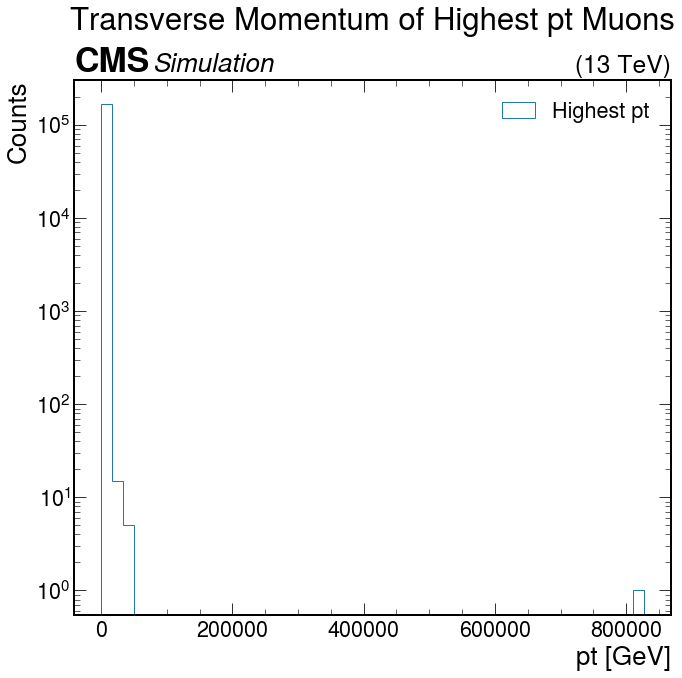

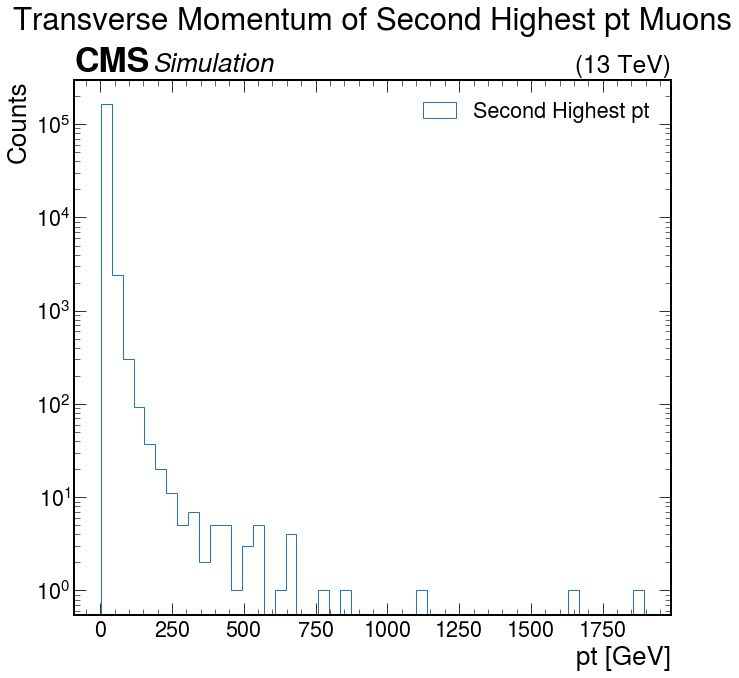

In [7]:
# Access the muon collection
muons = events.Muon
#muons = muons[muons.pt <= 200000]
# Select events with 2 or more muons
dimuon_events = muons[(ak.num(muons) >= 2)]

# Print some debugging information
print(ak.num(muons))
print(ak.num(muons) >= 2)

# Sort the muons by pt in each event
sorted_dimuon_events = dimuon_events[ak.argsort(dimuon_events.pt, axis=1, ascending=False)]
print(sorted_dimuon_events.pt)

# Select the highest pt muons
highest_pt_muons = sorted_dimuon_events[:, 0]  # First muon in each event
print(highest_pt_muons.pt)

# Select the second-highest pt muons
second_highest_pt_muons = sorted_dimuon_events[:, 1]  # Second muon in each event
print(second_highest_pt_muons.pt)

# Plot the highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(highest_pt_muons.pt), bins=50, histtype='step', label="Highest pt")
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Highest pt Muons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

# Plot the second-highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(second_highest_pt_muons.pt), bins=50, histtype='step', label="Second Highest pt")
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Second Highest pt Muons", pad=50)  # Adjust title position
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

In [8]:
genparts = events.GenPart
#print(genparts.pdgId[genparts.pdgId > 100])
"""
particles = []
for particle in ak.flatten(genparts.pdgId):
    # Check if the particle is already in the list
    if particle in particles:
        continue
    # If not, append it to the list
    particles.append(particle)
    particles.sort()
print(particles)
"""

print("sorted list of all particle pdg id's in TChiWZ MC")
genid = ak.to_numpy(ak.flatten(genparts.pdgId)) # Cast to numpy array after flatten
print(len(genparts))
print(len(ak.flatten(genparts.pdgId)))
genid = np.unique(genid) # Reducing to unique values 
genid = np.sort(genid)
print(genid)

sorted list of all particle pdg id's in TChiWZ MC
1122520
41465749
[-1000024   -20433    -5334    -5332    -5324    -5322    -5314    -5312
    -5232    -5224    -5222    -5214    -5212    -5132    -5122    -5114
    -5112    -4334    -4332    -4324    -4322    -4314    -4312    -4232
    -4224    -4222    -4214    -4212    -4132    -4124    -4122    -4114
    -4112    -3214    -3212    -2214    -2114    -2112     -543     -541
     -533     -531     -523     -521     -513     -511     -435     -433
     -431     -425     -423     -421     -415     -413     -411     -323
     -321     -313     -311     -213     -211      -24      -16      -15
      -14      -13      -12      -11       -5       -4       -3       -2
       -1        1        2        3        4        5       11       12
       13       14       15       16       21       22       23       24
      111      113      130      211      213      221      223      310
      311      313      321      323      331      333   

For reference, from the pdg id [table](https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf): 

$\tilde{e}^-_{L}$ = 1000011

$\tilde{µ}^-_L$ = 1000013

$\tilde{χ}^0_1$ = 1000022

$\tilde{χ}^0_2$ = 1000023

$\tilde{χ}^+_1$ = 1000024

$\tilde{e}^-_{R}$ = 2000011

$\tilde{µ}^-_R$ = 2000013







I'd like to learn more about how all this GenParent stuff is interconnected, like how are these decays formatted?

In [9]:
events.GenPart.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG',
 'distinctChildrenDeepIdxG']

In [10]:
print(events.GenPart.genPartIdxMother.__doc__)
print(events.GenPart.genPartIdxMotherG.__doc__)

index of the mother particle
index of the mother particle


Unique mass points for Chi_0_1, lightest neutralino in TChiWZ MC
[ 50.        60.        70.        75.        80.        85.
  90.        92.5       95.        97.        98.        98.5
  99.        99.20001   99.25      99.400024  99.5      100.
 105.       110.       115.       117.5      120.       122.
 123.       123.5      124.       124.20001  124.25     124.400024
 124.5      125.       130.       135.       140.       142.5
 145.       147.       148.       148.5      149.       149.19995
 149.40002  149.5      150.       155.       160.       165.
 167.5      170.       172.       173.       173.5      174.
 174.19995  174.40002  174.5      175.       180.       185.
 190.       192.5      195.       197.       198.       198.5
 199.       199.19995  199.40002  199.5      200.       205.
 210.       215.       217.5      220.       222.       223.
 223.5      224.       224.19995  224.40002  224.5      225.
 230.       235.       240.       242.5      245.       247.
 248. 

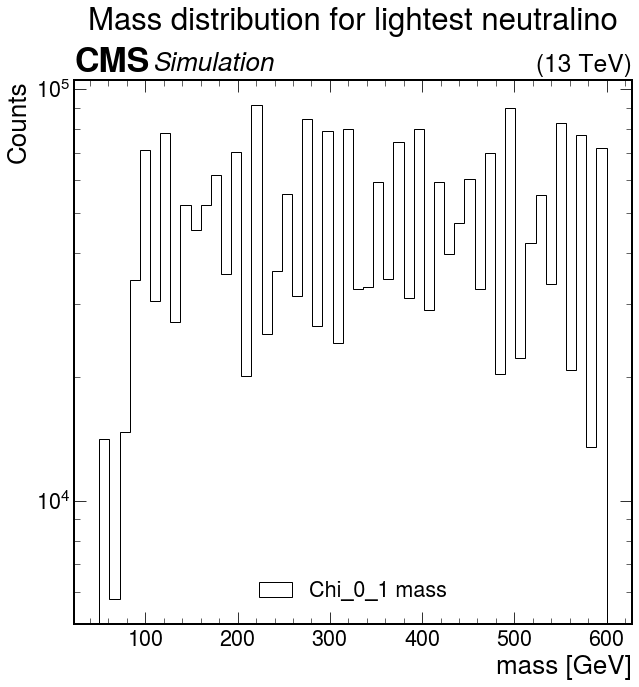

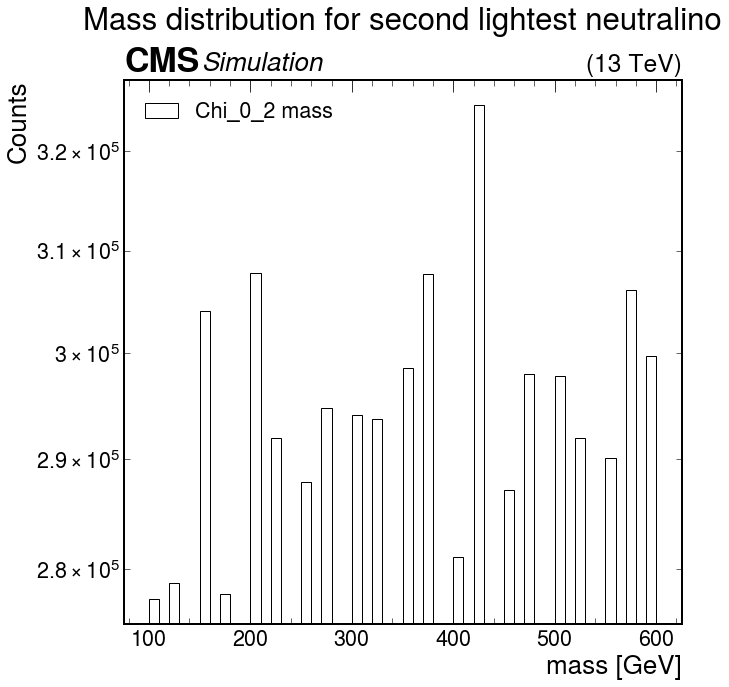

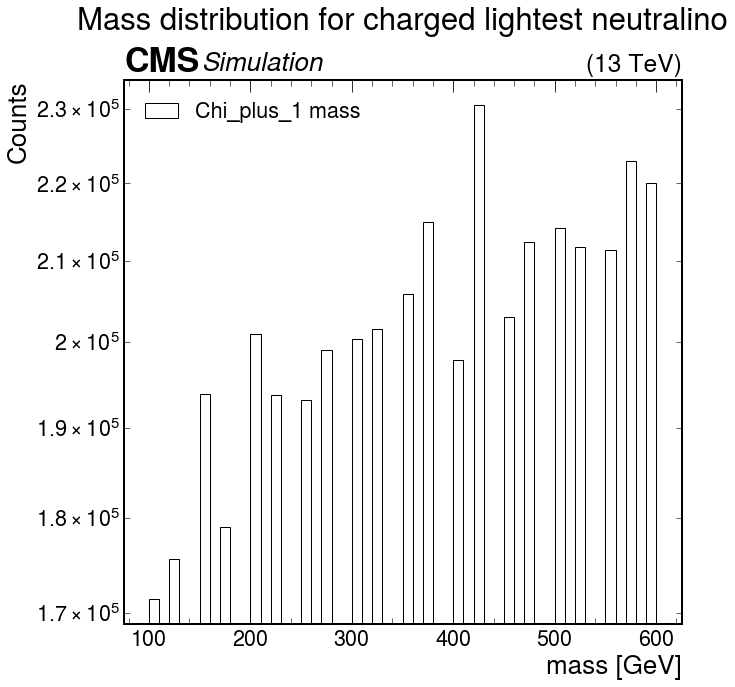

In [11]:
import os
chi_0_1_particles = genparts[(genparts.pdgId == 1000022)]

print("Unique mass points for Chi_0_1, lightest neutralino in TChiWZ MC")
mass_distro_chi_0 = ak.to_numpy(ak.flatten(chi_0_1_particles.mass)) # Cast to numpy array after flatten
mass_distro_chi_0 = np.unique(mass_distro_chi_0) # Reducing to unique values 
mass_distro_chi_0 = np.sort(mass_distro_chi_0)
print(mass_distro_chi_0)

chi_0_2_particles = genparts[(genparts.pdgId == 1000023)]
chi_plus_1_particles = genparts[(genparts.pdgId == 1000024)]
#print(chi_0_1_particles.pdgId)
#print(chi_0_1_particles.mass)
#print(chi_0_1_particles[:10].mass)

# Create the directory if it doesn't exist
output_dir = "TChiWZ_plots"
os.makedirs(output_dir, exist_ok=True)

# Assuming you've loaded the events and filtered particles already
# chi_0_1_particles, chi_0_2_particles, chi_plus_1_particles are defined

# Plot the lightest neutralino mass distribution
plt.figure()
plt.hist(ak.to_numpy(ak.flatten(chi_0_1_particles.mass)), bins=50, histtype='step', label="Chi_0_1 mass", color='black')
plt.xlabel("mass [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Mass distribution for lightest neutralino", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.legend()
# Save the figure to the specified directory
plt.savefig(os.path.join(output_dir, "chi_0_1_mass_distribution.png"))
plt.show()

# Plot the second lightest neutralino mass distribution
plt.figure()
plt.hist(ak.to_numpy(ak.flatten(chi_0_2_particles.mass)), bins=50, histtype='step', label="Chi_0_2 mass", color='black')
plt.xlabel("mass [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Mass distribution for second lightest neutralino", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
#plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
# Save the figure to the specified directory
plt.savefig(os.path.join(output_dir, "chi_0_2_mass_distribution.png"))
plt.show()

# Plot the charged lightest neutralino mass distribution
plt.figure()
plt.hist(ak.to_numpy(ak.flatten(chi_plus_1_particles.mass)), bins=50, histtype='step', label="Chi_plus_1 mass", color='black')
plt.xlabel("mass [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Mass distribution for charged lightest neutralino", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.legend()
# Save the figure to the specified directory
plt.savefig(os.path.join(output_dir, "chi_plus_1_mass_distribution.png"))
plt.show()


In [12]:
events.GenPart.genPartIdxMotherG.__doc__
events.GenPart.genPartIdxMother.__doc__

'index of the mother particle'

In [13]:
motherId = events.GenPart[0].genPartIdxMotherG
print(motherId)

[-1, -1, 0, 0, 2, 3, 4, 5, 6, 7, 8, ... -1, -1, -1, -1, -1, 32, 32, 35, 35, 33, 33]


In [14]:
print(f"Raw status flags: {events.GenPart.statusFlags}")
events.GenPart.hasFlags(['isPrompt', 'isLastCopy'])

Raw status flags: [[14721, 10625, 4481, 4481, 257, 257, ... 8193, 12354, 12352, 12352, 12352, 12352]]


<Array [[True, True, False, ... False, False]] type='1122520 * var * bool'>

In [15]:
events.GenPart[
    (abs(events.GenPart.pdgId) == 11)
    & events.GenPart.hasFlags(['isPrompt', 'isLastCopy'])
].distinctParent.pdgId

<Array [[23, 23], [-24], ... 23], [24, 23, 23]] type='1122520 * var * ?int32[par...'>

Above shows that we pretty much only have Z's and W's as our prompt particles (

In [16]:
#make a list of the decay chain of Chi_1 (pdgID = 1000022)
decay_chain = []
#work with just the first event, events.GenPart[0] for now
for particle in events.GenPart[0]:
    if particle.pdgId != 1000022:
        continue
    if particle.genPartIdxMotherG == 0:
        decay_chain.append(particle.pdgId)
        break
    if particle.genPartIdxMotherG != 0:
        decay_chain.append(particle.pdgId)

print(decay_chain)

[1000022, 1000022, 1000022]


Ok that was a good start, lets fix some things and modify:

In [17]:
#make a list of the decay chain of Chi_1 (pdgID = 1000022)
decay_chain = []

#work with just the first event, events.GenPart[0] for now
for particle in events.GenPart[0]:
    if particle.pdgId != 1000022:
        continue
    if particle.genPartIdxMotherG == 0:
        decay_chain.append(particle.pdgId)
        break
    if particle.genPartIdxMotherG != 0:
        decay_chain.append(particle.pdgId)

print(decay_chain)

[1000022, 1000022, 1000022]


In [21]:
"""#start with final state I want
decay_chain = []

#work with just the first event, events.GenPart[0] for now
for particle in events.GenPart[0]:
    # check to see if its a Chi_0
    if particle.pdgId != 1000022:
        continue
    # is the particle stable? stable is status = 1
    if particle.status == 1:
        particle.append(decay_chain)
        for parent in events.GenPart[0]:
            parent = events.GenPart[0][particle.genPartIdxMotherG]
            if parent.genPartIdXMother
            
            
        
    if particle.genPartIdxMotherG = 0:
        decay_chain.append(particle.pdgId)
        break
    if particle.genPartIdxMotherG != 0:
        decay_chain.append(particle.pdgId)

print(decay_chain)
"""

'#start with final state I want\ndecay_chain = []\n\n#work with just the first event, events.GenPart[0] for now\nfor particle in events.GenPart[0]:\n    # check to see if its a Chi_0\n    if particle.pdgId != 1000022:\n        continue\n    # is the particle stable? stable is status = 1\n    if particle.status == 1:\n        particle.append(decay_chain)\n        for parent in events.GenPart[0]:\n            parent = events.GenPart[0][particle.genPartIdxMotherG]\n            if parent.genPartIdXMother\n            \n            \n        \n    if particle.genPartIdxMotherG = 0:\n        decay_chain.append(particle.pdgId)\n        break\n    if particle.genPartIdxMotherG != 0:\n        decay_chain.append(particle.pdgId)\n\nprint(decay_chain)\n'

In [22]:
#test if distinct children = 0 for last particle in decay chain

events.GenPart[0].parent.children.pdgId


<Array [None, None, [-1000024, ... [11, -11]] type='43 * option[var * ?int32[par...'>

In [25]:
chi_0_1_particles = genparts[(genparts.pdgId == 1000022)]
print(chi_0_1_particles.pdgId)

print("Unique mass points for Chi_0_1, lightest neutralino in TChiWZ MC")
mass_distro_chi_0 = ak.to_numpy(ak.flatten(chi_0_1_particles.mass)) # Cast to numpy array after flatten
mass_distro_chi_0 = np.unique(mass_distro_chi_0) # Reducing to unique values 
mass_distro_chi_0 = np.sort(mass_distro_chi_0)
print(mass_distro_chi_0)

#chi_0_2_particles = genparts[(genparts.pdgId == 1000023)]
#chi_plus_1_particles = genparts[(genparts.pdgId == 1000024)]



[[1000022, 1000022, 1000022], [1000022, ... 1000022], [1000022, 1000022, 1000022]]
Unique mass points for Chi_0_1, lightest neutralino in TChiWZ MC
[ 50.        60.        70.        75.        80.        85.
  90.        92.5       95.        97.        98.        98.5
  99.        99.20001   99.25      99.400024  99.5      100.
 105.       110.       115.       117.5      120.       122.
 123.       123.5      124.       124.20001  124.25     124.400024
 124.5      125.       130.       135.       140.       142.5
 145.       147.       148.       148.5      149.       149.19995
 149.40002  149.5      150.       155.       160.       165.
 167.5      170.       172.       173.       173.5      174.
 174.19995  174.40002  174.5      175.       180.       185.
 190.       192.5      195.       197.       198.       198.5
 199.       199.19995  199.40002  199.5      200.       205.
 210.       215.       217.5      220.       222.       223.
 223.5      224.       224.19995  224.40002  

In [27]:
chi_0_2_particles = genparts[(genparts.pdgId == 1000023)]
print(chi_0_2_particles.pdgId)

print("Unique mass points for Chi_0_2, second lightest neutralino in TChiWZ MC")
mass_distro_chi_2 = ak.to_numpy(ak.flatten(chi_0_2_particles.mass)) # Cast to numpy array after flatten
mass_distro_chi_2 = np.unique(mass_distro_chi_2) # Reducing to unique values 
mass_distro_chi_2 = np.sort(mass_distro_chi_2)
print(mass_distro_chi_2)

#chi_0_2_particles = genparts[(genparts.pdgId == 1000023)]
#chi_plus_1_particles = genparts[(genparts.pdgId == 1000024)]

[[1000023, 1000023, 1000023, 1000023, ... 1000023, 1000023, 1000023, 1000023]]
Unique mass points for Chi_0_2, second lightest neutralino in TChiWZ MC
[100. 125. 150. 175. 200. 225. 250. 275. 300. 325. 350. 375. 400. 425.
 450. 475. 500. 525. 526. 550. 575. 576. 600.]


In [26]:
chi_plus_1_particles = genparts[(genparts.pdgId == 1000024)]
print("Unique mass points for Chi_plus_1, lightest chargino in TChiWZ MC")
mass_distro_chi_plus = ak.to_numpy(ak.flatten(chi_plus_1_particles.mass)) # Cast to numpy array after flatten
mass_distro_chi_plus = np.unique(mass_distro_chi_plus) # Reducing to unique values 
mass_distro_chi_plus = np.sort(mass_distro_chi_plus)
print(mass_distro_chi_plus)

Unique mass points for Chi_plus_1, lightest chargino in TChiWZ MC
[100. 125. 150. 175. 200. 225. 250. 275. 300. 325. 350. 375. 400. 425.
 450. 475. 500. 525. 526. 550. 575. 576. 600.]


In [29]:
from coffea.analysis_tools import PackedSelection

selection = PackedSelection()

selection.add("Chi_0_1_295", ak.any(genparts.pdgId == 1000022, axis=1) & ak.any(genparts.mass == 295))
selection.add("Chi_0_2_300", ak.any(genparts.pdgId == 1000023, axis=1) & ak.any(genparts.mass == 300))
selection.add("Chi_plus_300", ak.any(genparts.pdgId == 1000024, axis=1) & ak.any(genparts.mass == 295))


chi_0_2_300_to_chi_0_1_295 = events[selection.all("Chi_0_2_300", "Chi_0_1_295")]
chi_plus_1_300_to_chi_0_1_295 = events[selection.all("Chi_plus_300", "Chi_0_1_295")]

print(f"Total events: {len(events)}")
print(f"Events with Chi_0_2 300 GeV and Chi_0_1 295 GeV: {len(chi_0_2_300_to_chi_0_1_295)}")
print(f"Events with Chi_0_2 300 GeV and Chi_0_1 295 GeV: {len(chi_0_2_300_to_chi_0_1_295)}")




Total events: 1122520
Events with Chi_0_2 300 GeV and Chi_0_1 295 GeV: 1122520
Events with Chi_0_2 300 GeV and Chi_0_1 295 GeV: 1122520
